# 1.3.2: Calculating Error in a Fitted Curve

<br>

---

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---


This cell imports the data and creates the linear fitted line.  Run it as you start the notebook, but it also might come in handy as you work on the exercises later in the notebook:

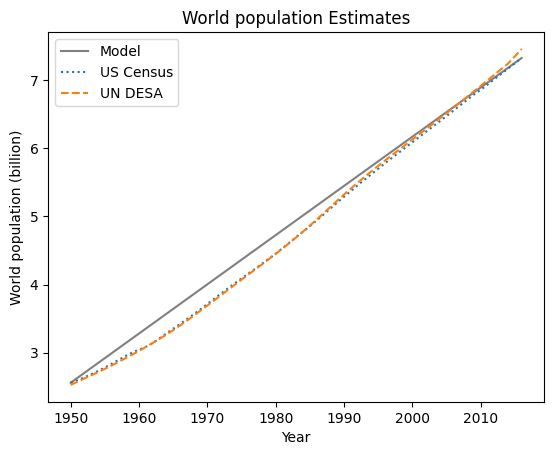

In [1]:
# @title
# Import Pandas and give it the shorthand name "pd"
import pandas as pd

# Define the file we want to import
address = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
file_loc = 'Images_and_Data/Data/World_pop_data.xlsx'

# Import the world population data
data = pd.read_excel(address + file_loc, header=0,index_col=0)
census = data.US_census
un = data.UN

# Create fitted curve
t_0 = census.index[0]
t_end = census.index[-1]
p_0 = census[t_0]
elapsed_time = t_end - t_0
total_growth = census[t_end] - census[t_0]
annual_growth = total_growth/ elapsed_time

# Create Fitted Line
results = pd.Series([],dtype=object)
results.name = 'Population'
results.index.name = 'Year'
results[t_0] = census[census.index[0]]
for t in range(census.index[0],census.index[-1]):
    results[t+1] = results[t] + annual_growth

# Plot
results.plot(color='gray', label='Model',title='Constant Growth Model',
            legend=True)
census.plot(style=':', label='US Census',legend=True)
un.plot(style='--', label='UN DESA',xlabel='Year',
             ylabel='World population (billion)',
            title='World population Estimates',
           legend=True);

## Is the model correct?: Quantifying error

We've created a model here and tried to fit our model to the data.   How do we determine whether it is a good model?  



### Absolute error

One way to characterize the "fit" of a model is *absolute error*, which is the absolute value of the difference between points in the original data and the points in our linear model. To compute absolute error, we want to find the absolute value of the difference between each point in the two `Series`.  We can use the NumPy function `abs` and simple subtraction to find this value for each year:

In [ ]:
from numpy import abs
abs_error = abs(census - results)
abs_error.tail()

Year
2012    2.313339e-02
2013    1.712461e-02
2014    1.153252e-02
2015    5.855920e-03
2016    1.065814e-14
dtype: float64

Because the result is a `Series`, we can plot it without much trouble:

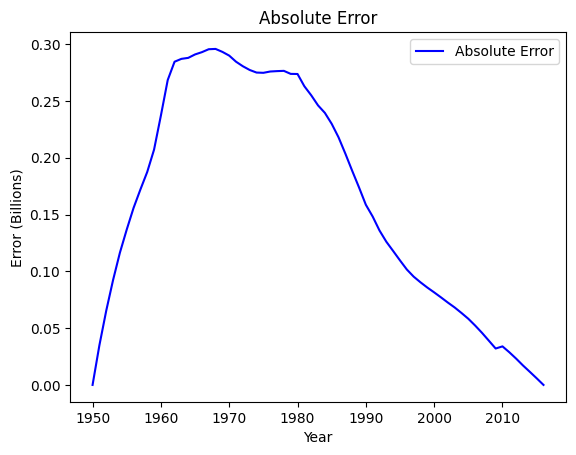

In [ ]:
abs_error.plot(color='blue', ylabel = 'Error (Billions)', label='Absolute Error',title='Absolute Error',
            legend=True);

We can use other NumPy functions to help us understand the data in this `Series`.  For instance, to summarize the results, we can compute the *mean absolute error* and *maximum absolute error*:

In [ ]:
from numpy import mean
from numpy import max

mean_abs = mean(abs_error)
max_abs = max(abs_error)
print("The average error is ", round(mean_abs,3), "billion people,")
print("while the maximum error is ", round(max_abs,3), " billion people.")

The average error is  0.164 billion people,
while the maximum error is  0.296  billion people.


On average, the model was off by about 0.16 billion people, and in the worst case, it was off by about 0.3 billion.  0.3 billion is a lot of people, so that might sound like a serious discrepancy.
But counting everyone is the world is hard, and we should not expect the estimates to be exact: it's still hard to tell if this is a significant error!

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/1_3/billion.PNG width = 400>
</center>

### Relative Error

This is where *relative error* is helpful.  Relative error is the *percentage* difference between the values in the two `Series`.  To find this, we divide the absolute error by the estimates themselves and multiply by 100:

In [ ]:
rel_error = (abs_error / census) * 100

Now let's check out the results:

The average error is  4.109170568757119 percent, while the maximum error is  9.060605126615325  percent.
   


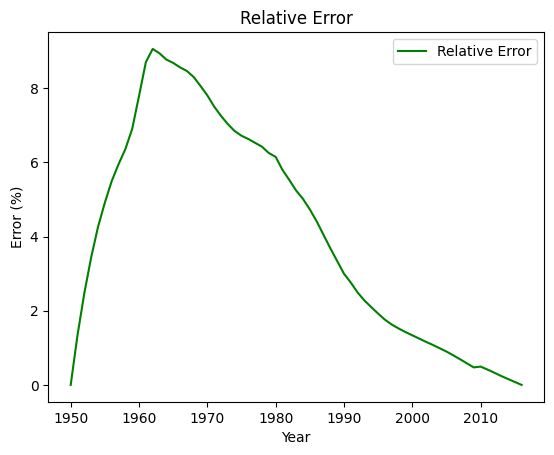

In [ ]:
# Plot the relative error
rel_error.plot(color='green', ylabel = 'Error (%)', label='Relative Error',title='Relative Error',
            legend=True);

# Calculate the mean and maximum relative error
mean_rel = mean(rel_error)
max_rel = max(rel_error)
print("The average error is ", mean_rel, "percent, while the maximum error is ", max_rel, " percent.")
print("   ")

Whoa!  9% is a pretty significant error.  And notice that it's a lot easier to understand the importance of this number than the raw absolute error.  I think we're going to have to iterate our model (what a surprise! 😏 ).

---
<br>

🟨 🟨

In [2]:
from urllib.request import urlretrieve
location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('1_3_world_pop',home,4)
answer = "B" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)

Why is the peak on the plot of relative error than sharper than the peak on the absolute error plot?

A) The newer data is given more weight because the index values are larger
B) The lower populations in the early years mean that the relative error is larger for a given absolute error
C) The lower populations in the early years mean that the relative error is smaller for a given absolute error
D) It is just a matter of the different units on the y-axis

Correct
Yep!  A 0.3 billion error is relatively larger when the average population is 3 billion than when the population is 6 billion.



---

## Exercises

---

<br>

🟨 🟨

### Exercise 1

Clearly the population data is not really linear.  But by observation, we can see that see that the data seems to be roughly linear from about 1970 to present.  Let's see if we can use that data to get a better fit.  Try fitting the linear model using data from 1970 to the present, and see if that does a better job.

<br>

Suggestions:

1. All of the code from the previous notebook is in the first cell of this notebook.  Use this to help you.

2. Define the growth constant by looking at data between 1970 and the present.  In other words, define `t_1` to be 1970 (i.e. `t1 = census.index[20]` and `p_1` to be the population in 1970.  Use `t_1` and `p_1` to compute annual growth.  

3. Once you have the annual growth, start the simulation in 1950 with the 1950 population: use `t_0` and `p_0` for the for-loop simulation.


In [ ]:
# Compute the growth constant: average annual growth from 1970 to 2016
# Follow the same process we used above, but use different t_1 and p_1 as
# explained above



In [ ]:
# Store model results from 1950 to the present in Series called 'results_new'
# The process will be similar to the one used in last notebook


In [ ]:
# Plot "results_new" compared to the known data


In [ ]:
# Find the mean relative error of this model


---

<br>

🟨 🟨

### Exercise 2

So we now have a plot that matches the slope from 1970 to present well, but our starting point in 1950 means that our curve is far off the actual data.  We now want to "shift" our "new_results" curve to produce a much smaller relative error.

<br>

To do this, we'll create a "shift constant": a value that we'll add to the population of every year.  This will "shift" our fitted curve up (if `shift_constant` is positive) or down without changing its slope.

In [ ]:
# First guess at a shift constant (do you want the line to move up or down?)
# After plot, you can adjust this constant, run this cell, and then rerun your plot
shift_constant = 0.0



In [ ]:
# This subtracts the shift constant from each data point in the "new_results" model
results_shifted = results_new - shift_constant

In [ ]:
# Plot "results_shifted" compared to the known data


In [ ]:
# Determine the relative error between the model and the census data


---

<br>

🟨 🟨

### Exercise 3

Explore the model you built in Exercise 1 until you find the `shift_constant` that creates the smallest average relative error.  Then answer these questions:

* What is the best shift constant?  
* If things went well, you were able to get the average error down to 2% or even less.  This seems OK, right?  However, we're trying to understand population growth.   Even if a linear model fits the data, what about the nature of population growth makes it unlikely that a linear model would be accurate in the long haul?  Use your physical intuition to think about what kind of growth you might expect for a population.

✅ ✅  Put your answer here.